<a href="https://colab.research.google.com/github/kimbaorrr/data_science/blob/main/laptop_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

In [2]:
sns.set_style('whitegrid')

# **Nạp dữ liệu**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/TF_Training/datasets/data_science/Laptop_price.csv', delimiter=',')
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


#**Tổng quan dữ liệu**

In [4]:
# Liệt kê thuộc tính
df.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

In [5]:
# Liệt kê các giá trị duy nhất của một số thuộc tính
for i in ['Brand', 'RAM_Size', 'Storage_Capacity', 'Screen_Size']:
  print(f'{i}\n{df[i].unique()}')

Brand
['Asus' 'Acer' 'Lenovo' 'HP' 'Dell']
RAM_Size
[16  4 32  8]
Storage_Capacity
[ 512 1000  256]
Screen_Size
[11.18514743 11.3113718  11.85302268 12.28036009 14.99087717 11.94395768
 11.71324635 15.58831485 15.0263317  13.61194533 14.29585863 12.87190412
 13.89500252 14.04003589 13.32342363 16.43943326 11.09637119 15.69302758
 11.74629699 15.78528416 14.69547149 16.05966855 11.58508595 14.3538838
 14.00652728 15.2371591  14.20574331 14.2444074  13.57757566 12.85300654
 13.89358617 11.71095415 16.76908003 15.28646458 16.7148027  12.36036429
 16.27604612 15.85273991 15.06291447 14.75017512 12.89929799 15.89846471
 14.00909277 11.42534946 12.87717897 16.61178259 16.10408156 16.89143419
 14.7679603  12.48506044 11.9768903  12.12148664 11.11877395 13.34409267
 12.14856608 13.46993276 16.60996659 13.58324126 16.26790698 14.6330286
 12.48278933 13.13512856 11.50351721 13.00077556 15.06524567 11.43266656
 12.23240845 13.28864625 16.89229722 15.70917094 15.40092048 11.69714574
 15.68597536 1

In [6]:
# Kiểu dữ liệu của từng thuộc tính
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


#**Tiền xử lý dữ liệu**

In [7]:
# Chuyển đổi tên thuộc tính thành chữ thường
df.columns = map(str.lower, df.columns)

In [8]:
# Kiểm tra giá trị N/A
df.isna().sum()

brand               0
processor_speed     0
ram_size            0
storage_capacity    0
screen_size         0
weight              0
price               0
dtype: int64

In [9]:
# Kiểm tra giá trị ngoại lai
df.describe()

,processor_speed,ram_size,storage_capacity,screen_size,weight,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [10]:
# Kiểm tra giá trị trùng lặp
df.duplicated().sum()

0

In [11]:
# Giảm số thập phân
df['processor_speed'] = df['processor_speed'].round(2)
df['screen_size'] = df['screen_size'].astype(int)
df['weight'] = df['weight'].round(1)
df['price'] = df['price'].astype(int)
df.sample(10)

,brand,processor_speed,ram_size,storage_capacity,screen_size,weight,price
997,Dell,3.20,4,512,12,3.4,16552
812,Dell,2.08,32,256,13,3.0,10487
687,Dell,1.51,4,1000,14,2.2,31227
926,HP,2.26,32,512,11,3.6,18124
10,Asus,3.84,4,1000,14,3.1,31967
444,Acer,3.67,8,512,16,2.5,17203
892,HP,3.02,16,1000,12,3.9,31992
168,Dell,2.22,4,256,14,3.8,9000
967,Acer,2.72,8,1000,16,3.5,31701
649,HP,1.94,16,256,14,4.0,9643


#**Trực quan hóa**

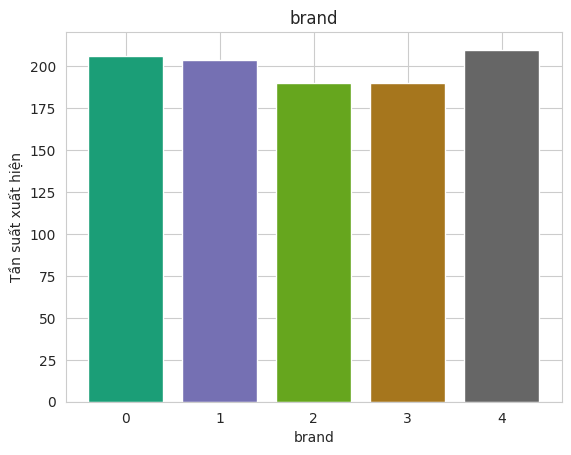

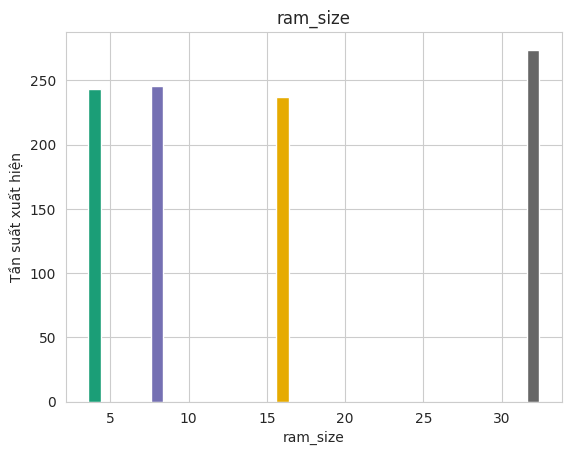

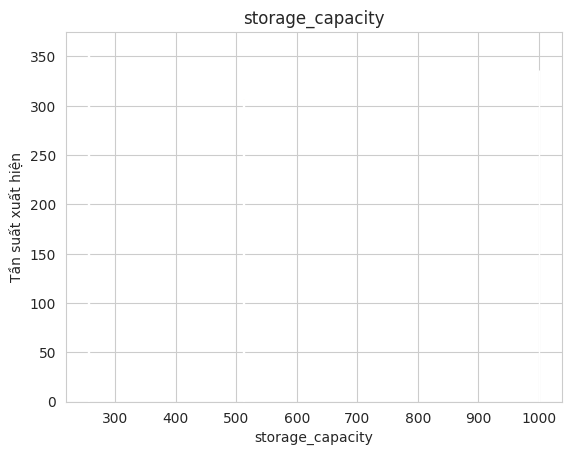

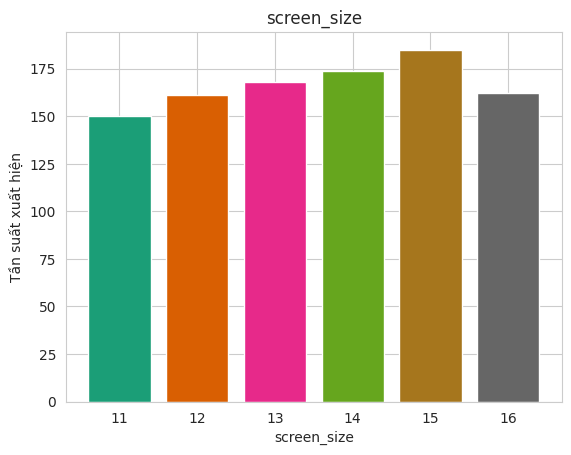

In [25]:
df_categorical = ['brand', 'ram_size', 'storage_capacity','screen_size']
for column in df_categorical:
    values, counts = np.unique(df[column], return_counts=True)
    colors = plt.cm.Dark2(np.linspace(0, 1, len(values)))
    plt.bar(values, counts, color=colors)
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Tần suất xuất hiện')
    plt.savefig(f'/content/chart_of_{column}.jpg')
    plt.show()

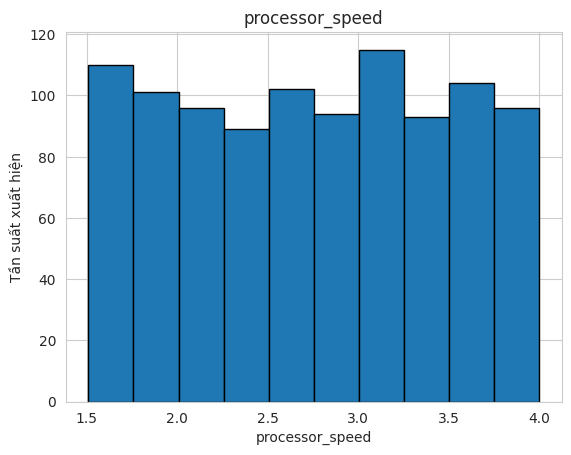

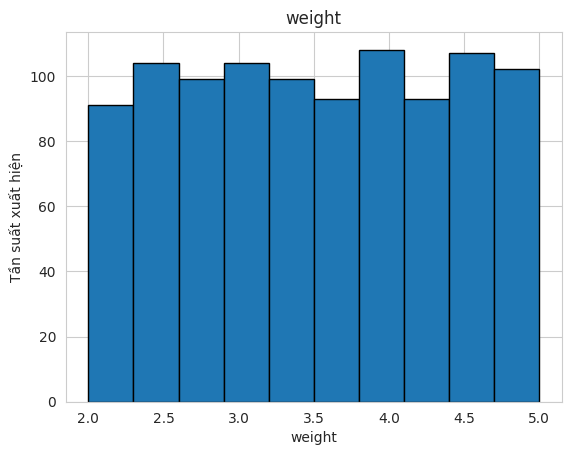

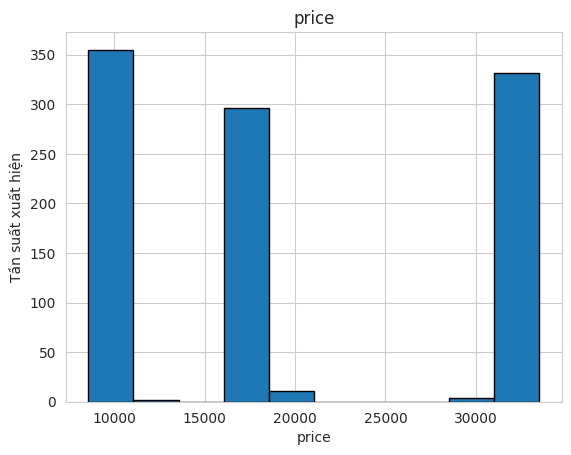

In [13]:
df_numerical2 = ['processor_speed', 'weight', 'price']

for column in df_numerical2:
    plt.hist(df[column], edgecolor='black')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Tần suất xuất hiện')
    plt.savefig(f'/content/chart_of_{column}.jpg')
    plt.show()

#**Mapping dữ liệu**

In [14]:
# Liệt kê các thuộc tính là chuỗi
for i in df.columns:
  if df[i].dtypes == object:
    print(i)

brand


In [15]:
# Chuyển đổi phần tử trong thuộc tính brand thành chữ thường
df['brand'] = df['brand'].str.lower()
df['brand'].unique()

array(['asus', 'acer', 'lenovo', 'hp', 'dell'], dtype=object)

In [16]:
# Bắt đầu mapping
brand_mapping = {'asus': 0, 'acer': 1, 'lenovo': 2, 'hp': 3, 'dell': 4}
df['brand'] = df['brand'].map(brand_mapping)


In [17]:
# Thêm biến phân loại price
bins = [-np.inf,15000, 30000, np.inf]
labels=['low', 'medium', 'high']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

In [18]:
# Thêm biến phân loại screen_size
bins = [-np.inf,13, np.inf]
labels=['small', 'big']
df['screen_size_category'] = pd.cut(df['screen_size'], bins=bins, labels=labels)

In [19]:
# Thêm biến phân loại processor_speed
bins = [-np.inf, 2, 3, np.inf]
labels=['low', 'medium', 'high']
df['processor_speed_category'] = pd.cut(df['processor_speed'], bins=bins, labels=labels)

In [20]:
# Kiểm tra lại thuộc tính price_category
df.sample(10)

,brand,processor_speed,ram_size,storage_capacity,screen_size,weight,price,price_category,screen_size_category,processor_speed_category
856,2,2.16,32,1000,11,4.5,32764,high,small,medium
906,1,2.28,4,1000,13,4.0,31431,high,small,medium
636,4,2.72,32,1000,16,2.6,32761,high,big,medium
969,1,2.31,8,512,13,4.6,16945,medium,small,medium
587,4,2.15,16,256,12,3.8,9740,low,small,medium
355,2,3.59,16,512,13,5.0,17642,medium,small,high
335,3,2.74,16,512,15,2.4,17811,medium,big,medium
273,0,2.22,32,1000,12,3.0,32437,high,small,medium
755,2,3.00,32,512,13,4.8,18286,medium,small,medium
578,3,2.12,32,256,13,2.2,10413,low,small,medium


#**Trực quan hóa (2)**

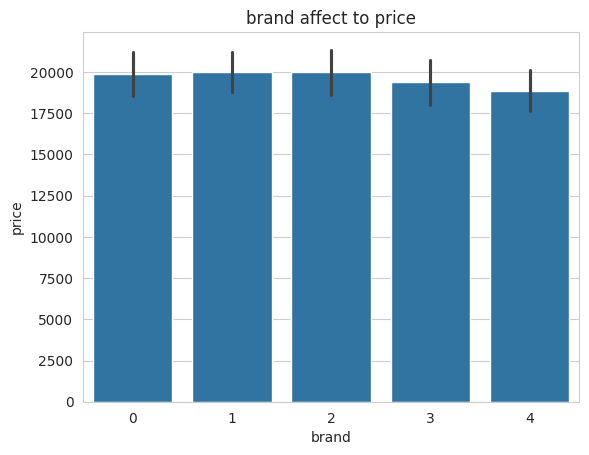

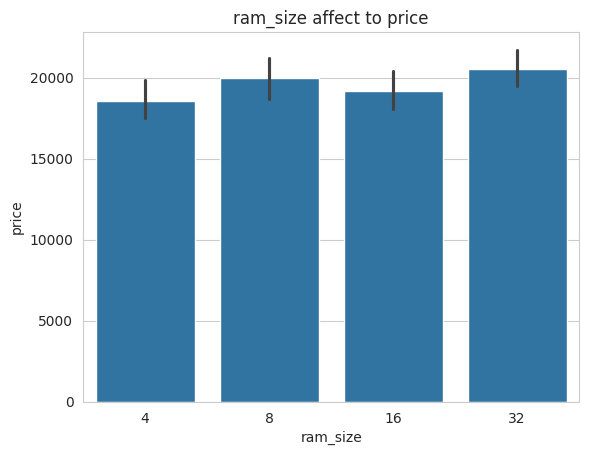

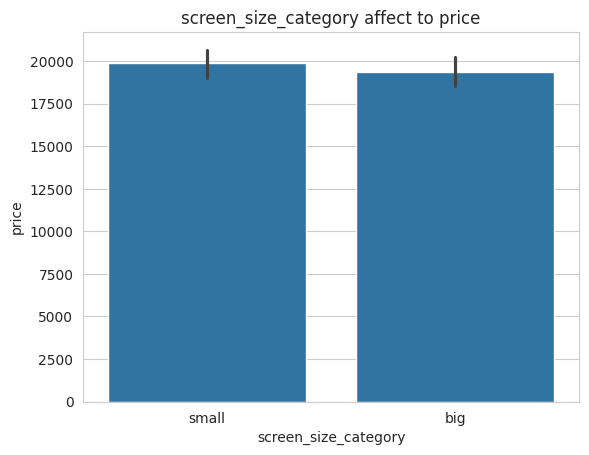

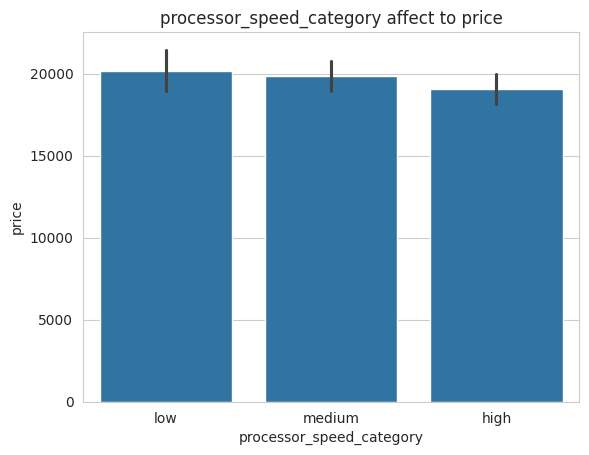

In [24]:
df_columns = ['brand', 'ram_size', 'screen_size_category', 'processor_speed_category']
for i in df_columns:
  sns.barplot(
      df,
      x=i,
      y='price'
  )
  plt.title(f'{i} affect to price')
  plt.show()

<ipython-input-28-dbb48bb78374>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


<Axes: >

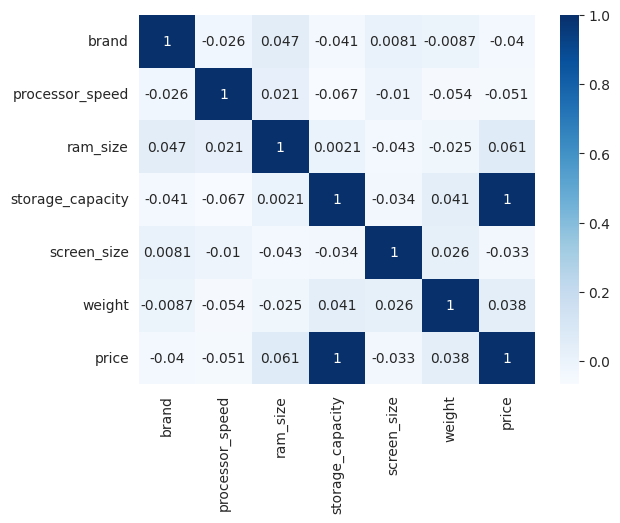

In [28]:
# Mức ảnh hưởng của từng thuộc tính
sns.heatmap(df.corr(), annot=True, cmap='Blues')

#**Tách tập dữ liệu**

In [30]:
X = df.drop(columns=['price',	'price_category',	'screen_size_category',	'processor_speed_category'])
Y = df['price']

# Tách dữ liệu để Train/Test/Val
x_train, x_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=.20,
    random_state=50
)
x_train, x_val, y_train, y_val = train_test_split(
    x_train,
    y_train,
    test_size=.10,
    random_state=30
)
print('Số dòng dữ liệu có trong tập Train/Test/Val')
print(f'{x_train.shape[0]}\n{x_test.shape[0]}\n{x_val.shape[0]}')


Số dòng dữ liệu có trong tập Train/Test/Val
720
200
80


#**Xây dựng mô hình**

In [54]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#**Đánh giá mô hình**

In [55]:
# Đánh giá tập Test
y_pred = model.predict(x_test)
print('Độ chính xác:', model.score(x_test, y_test))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2_Score:', r2_score(y_test, y_pred))

Độ chính xác: 0.999557983743676
MSE: 41171.33687685649
R2_Score: 0.999557983743676


In [56]:
# Đánh giá tập Val
val_pred = model.predict(x_val)
print('Độ chính xác:', model.score(x_val, y_val))
print('MSE:', mean_squared_error(y_val, val_pred))
print('R2_Score:', r2_score(y_val, val_pred))

Độ chính xác: 0.9996782464599028
MSE: 29750.254612647423
R2_Score: 0.9996782464599028
